Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

hi


Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
import thinkstats2
import numpy as np
import brfss
import pandas
import matplotlib.pyplot as plt

df = brfss.ReadBrfss()
df = df.dropna(subset=['wtkg2', 'htm3'])
df['logwtkg2'] = np.log10(df.wtkg2)

In [3]:
df.describe()

,age,sex,wtyrago,finalwt,wtkg2,htm3,logwtkg2
count,393518.000000,395832.000000,388137.000000,395832.000000,395832.000000,395832.000000,395832.000000
mean,54.891207,1.612730,79.766921,562.527274,79.044413,168.956188,1.885415
std,16.742237,0.487127,20.574880,1076.206594,19.547890,10.390752,0.103207
min,18.000000,1.000000,22.727273,1.695143,20.000000,61.000000,1.301030
25%,43.000000,1.000000,64.545455,97.241254,64.550000,163.000000,1.809896
50%,55.000000,2.000000,77.272727,234.914579,77.270000,168.000000,1.888011
75%,67.000000,2.000000,90.909091,593.585278,90.910000,178.000000,1.958612
max,99.000000,2.000000,342.272727,60995.111700,300.000000,236.000000,2.477121


In [15]:
inter, slope = thinkstats2.LeastSquares(df.htm3,df.logwtkg2)
print "Intercept: " + str(inter)
print "Slope: " + str(slope)

fit_xs, fit_ys = thinkstats2.FitLine(df.htm3, inter, slope)

Intercept: 0.993080416392
Slope: 0.00528145416942


I think that re-transforming the data back into their original units is probably the best way to visually present the results. 

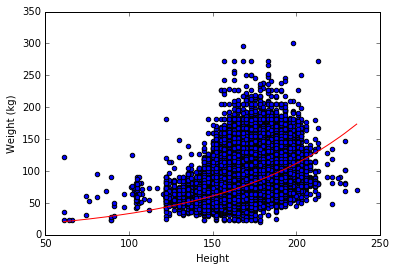

In [14]:
plt.plot(fit_xs, np.power(10, fit_ys),'r')
plt.scatter(df.htm3,df.wtkg2)
plt.ylabel('Weight (kg)')
plt.xlabel('Height')

In [16]:
resid = thinkstats2.Residuals(df.htm3, df.logwtkg2, inter, slope)

In [17]:
print 'RMSE (Without knowing height): ', thinkstats2.Std(df.logwtkg2)
print 'RMSE (With knowing height): ', thinkstats2.Std(resid)
print
print 'R-squared: ', thinkstats2.CoefDetermination(df.logwtkg2, resid)

RMSE (Without knowing height):  0.1032072503
RMSE (With knowing height):  0.0874077708042

R-squared:  0.282734943119


A person's height accounts for 28% of the variance in their weight

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

I found this chapter's notebook to be harder than previous. I think that the question asked was helped very much by the reading. It also took me longer than it should have to figure out how to read in the data.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.